In [1]:
import librosa
import ffmpeg
import librosa.display
import matplotlib.pyplot as plt
import soundfile
import audioread



In [2]:
from librosa import display
import librosa.display as display
from librosa.display import waveshow



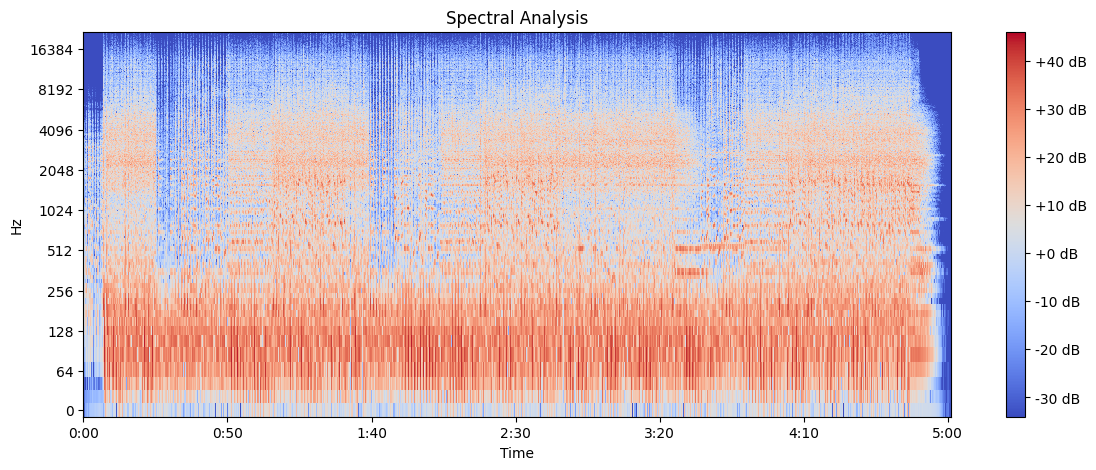

In [3]:
# Load the audio file
file_path = '01 Smells Like Teen Spirit.wav'
audio, sample_rate = librosa.load(file_path, sr=None)

# Perform a Short-Time Fourier Transform (STFT) to get the frequency content over time
stft = librosa.stft(audio)

# Convert the STFT to decibels, which is a more useful measure for human hearing
db_stft = librosa.amplitude_to_db(abs(stft))

# Plot the spectrogram
plt.figure(figsize=(14, 5))
librosa.display.specshow(db_stft, sr=sample_rate, x_axis='time', y_axis='log', cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectral Analysis')
plt.show()

For "Smells Like Teen Spirit," we can observe several characteristics of the song's frequency content over time:

Low Frequencies: There is significant energy below 256 Hz, indicating strong bass and kick drum presence. This area likely needs to be tight and punchy, without too much boominess.

Mid Frequencies: The range from 256 Hz to around 2 kHz seems to have varying energy levels, which can correspond to the body of the guitars, the snare drum, and the lower register of the vocals. The mids are crucial for the clarity and presence of the track.

High Mid Frequencies: Between approximately 2 kHz and 4 kHz, we see some peaks which might indicate the presence of vocal sibilance, the attack of the snare drum, and guitar string noise. These frequencies can add definition but also harshness if not balanced well.

High Frequencies: Above 4 kHz, there is less energy, but it's still essential for the sense of "air" and brightness in the track. Cymbals, the high end of the guitars, and certain vocal harmonics will live in this range

Using this information, you can make informed decisions on how to shape the EQ curve for your mix. Remember, the goal of EQ in mixing is to ensure that each element has its own space in the frequency spectrum, and that the overall mix sounds balanced and clear. If you're mixing this on an Allen & Heath dLive s7000 console, you would typically apply EQ adjustments in a more detailed way, considering each instrument's and vocal's role in the mix.

Frequency Range Identification:

Software: Digital Audio Workstations (DAWs) like Pro Tools, Ableton Live, Logic Pro, and others have built-in spectrum analyzers and EQ plugins that can help identify frequency ranges of instruments and vocals.
Python Libraries: librosa is a Python library that can perform spectral analysis, and numpy can be used to analyze frequency data.
Dynamics Analysis:

Software: You can use DAWs with dynamics plugins or dedicated analysis tools like iZotope Insight or Waves PAZ Analyzer for visualizing and analyzing dynamics.
Python Libraries: pydub can help analyze loudness and dynamics to some extent, although it's less sophisticated compared to professional audio software.
Transient Analysis:

Software: Specialized transient analysis plugins, like those from FabFilter or SPL, can visualize and alter transients. DAWs also typically have transient detection and editing capabilities.
Python Libraries: librosa provides some functionality for onset detection, which is a form of transient analysis.
Harmonic Analysis:

Software: DAWs with pitch-correction plugins like Celemony's Melodyne or Antares Auto-Tune can help visualize and analyze harmonics.
Python Libraries: librosa can also perform harmonic analysis by separating harmonic elements from percussive elements in an audio signal.

Spectral Analysis: This provides a visual representation of the different frequencies present in the audio track over time. It helps to identify which frequencies are most prominent or may need adjustment.

Frequency Range Identification: Determining the frequency ranges of various instruments and vocals within the track to understand where they sit in the mix.

Dynamics Analysis: Understanding the dynamic range of the audio can help in making decisions about compression before EQ adjustments.

Transient Analysis: This involves looking at the attack and decay of various sounds, which can influence EQ decisions, especially in terms of clarity and separation of instruments.

Harmonic Analysis: Identifying the harmonic content of the track can assist in making EQ choices that affect the warmth, brightness, or presence of the audio.

In [4]:
y, sr = librosa.load('01 Smells Like Teen Spirit.wav')



In [5]:
 # Calculate the spectral centroid and bandwidth
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)[0]

In [6]:
# Convert frame counts to time
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames, sr=sr)

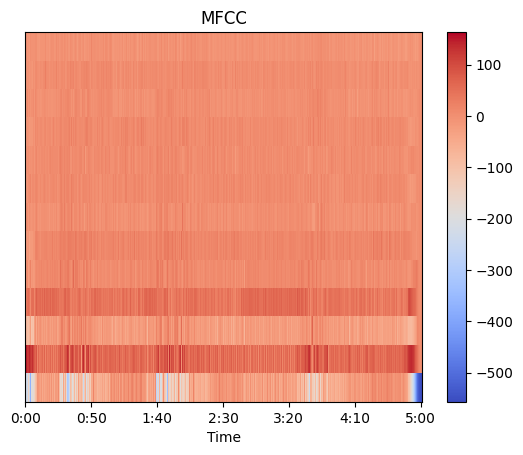

In [7]:
# Mel-Frequency Cepstral Coefficients (MCFFs):
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.show()


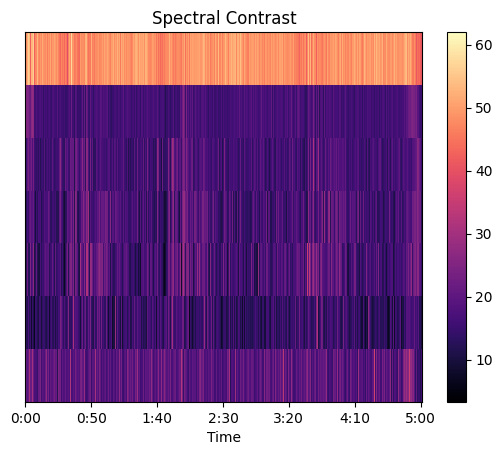

In [8]:
# Spectral Contrast:
spec_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
librosa.display.specshow(spec_contrast, x_axis='time')
plt.colorbar()
plt.title('Spectral Contrast')
plt.show()


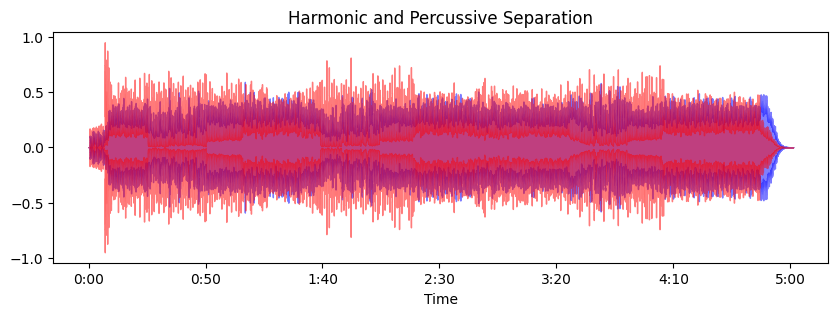

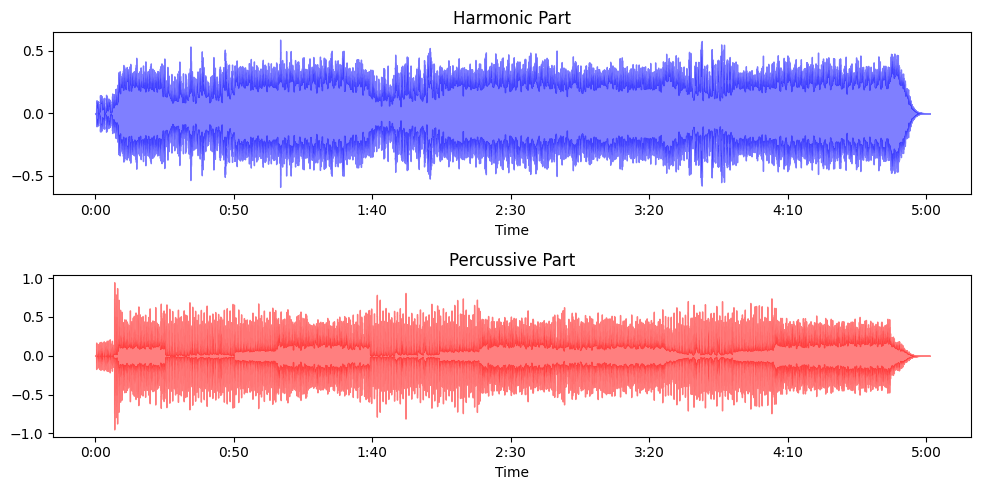

In [9]:
# Harmonic & Percussove Separation: 
y_harm, y_perc = librosa.effects.hpss(y)
plt.figure(figsize=(10, 3))
librosa.display.waveshow(y_harm, sr=sr, alpha=0.5, color='b')
librosa.display.waveshow(y_perc, sr=sr, alpha=0.5, color='r')
plt.title('Harmonic and Percussive Separation')
plt.show()

import librosa
import matplotlib.pyplot as plt

# Load an audio file
y, sr = librosa.load('01 Smells Like Teen Spirit.wav')

# Perform the harmonic-percussive separation
y_harmonic, y_percussive =librosa.effects.hpss(y)

# Plotting
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
librosa.display.waveshow(y_harmonic, sr=sr, color='b', alpha=0.5)
plt.title('Harmonic Part')

plt.subplot(2, 1, 2)
librosa.display.waveshow(y_percussive, sr=sr, color='r', alpha=0.5)
plt.title('Percussive Part')
plt.tight_layout()
plt.show()


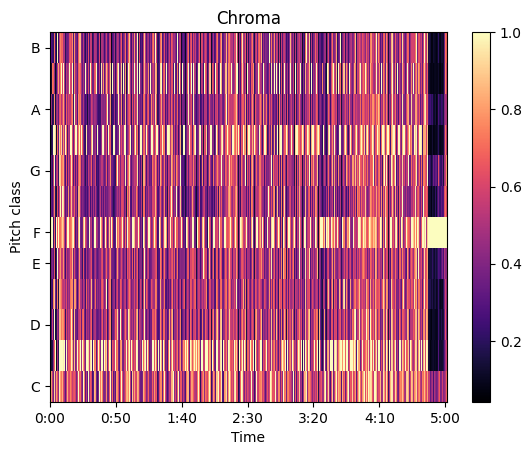

In [10]:
# Chroma Feature Extraction: 
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chroma')
plt.show()


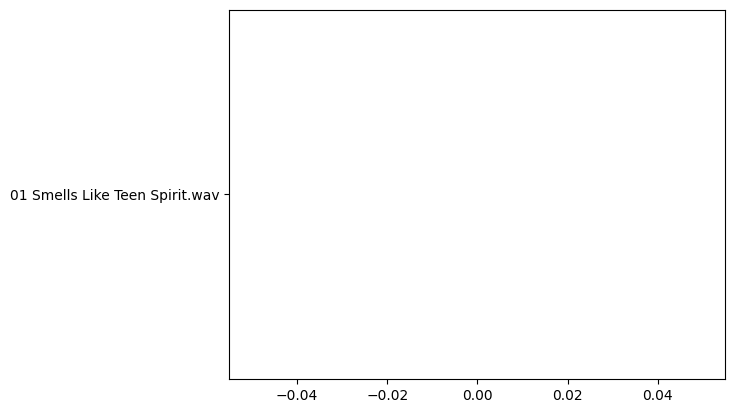

In [11]:
plt.plot(file_path)

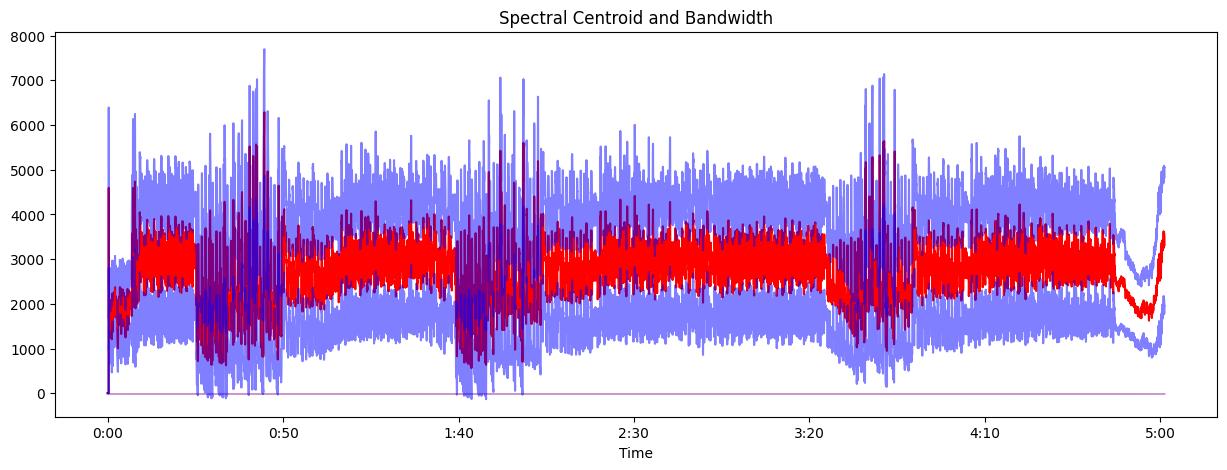

In [12]:

# Plotting the Spectral Centroid along the waveform
plt.figure(figsize=(15, 5))
librosa.display.waveshow(y, sr=sr, alpha=0.4, color="purple")
plt.plot(t, spectral_centroids, color='r') # Spectral centroid
plt.plot(t, spectral_centroids - spectral_bandwidth / 2, color='b', alpha=0.5) # Min range
plt.plot(t, spectral_centroids + spectral_bandwidth / 2, color='b', alpha=0.5) # Max range
plt.title('Spectral Centroid and Bandwidth')
plt.show()


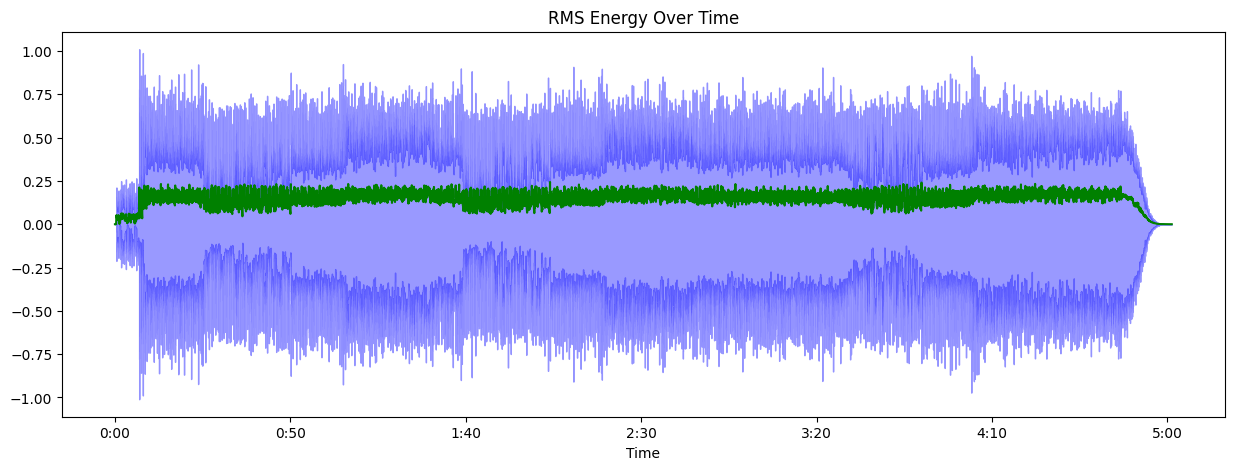

In [13]:
# Calculate the RMS energy
rms_energy = librosa.feature.rms(y=y)[0]

# Plotting the RMS along the waveform
plt.figure(figsize=(15, 5))
librosa.display.waveshow(y, sr=sr, alpha=0.4, color="blue")
plt.plot(t, rms_energy, color='g') # RMS Energy
plt.title('RMS Energy Over Time')
plt.show()


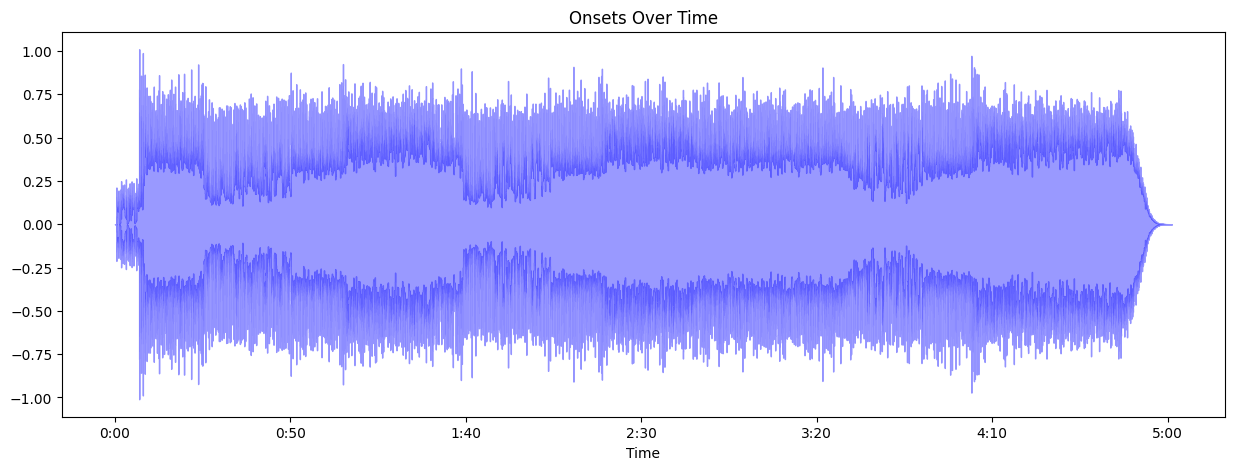

In [14]:
# Detect onsets
onset_frames = librosa.onset.onset_detect(y=y, sr=sr)
onset_times = librosa.frames_to_time(onset_frames, sr=sr)

# Plotting the onsets
plt.figure(figsize=(15, 5))
# librosa.display.waveshow(y, sr=sr, alpha=0.4)
# plt.vlines(onset_times, ymin=-1, ymax=1, color='r')
librosa.display.waveshow(y, sr=sr, alpha=0.4, color="blue")
plt.title('Onsets Over Time')
plt.show()




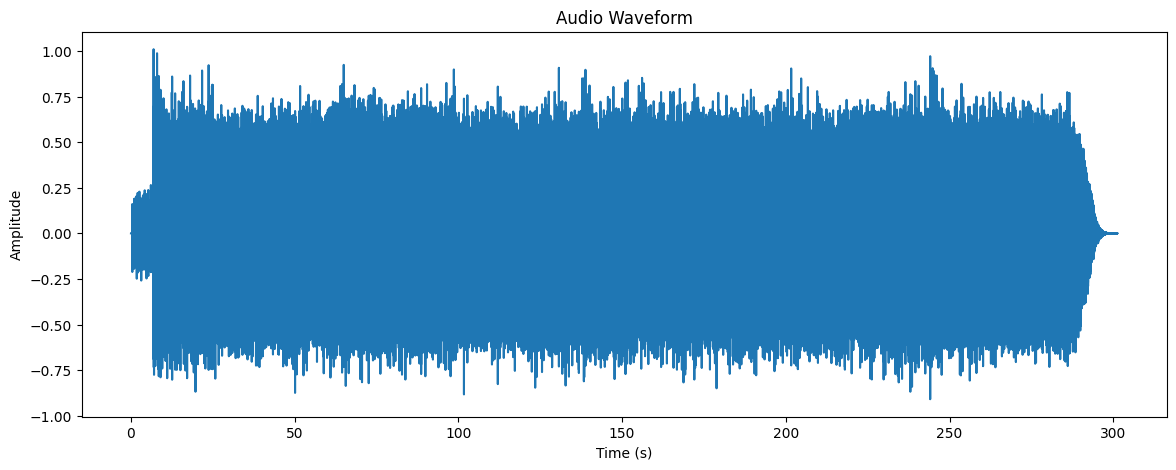

In [15]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Load your audio file
y, sr = librosa.load('01 Smells Like Teen Spirit.wav')

# Generate time axis data
time = np.linspace(0, len(y) / sr, num=len(y))

# Plot the waveform
plt.figure(figsize=(14, 5))
plt.plot(time, y)
plt.title('Audio Waveform')
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.show()


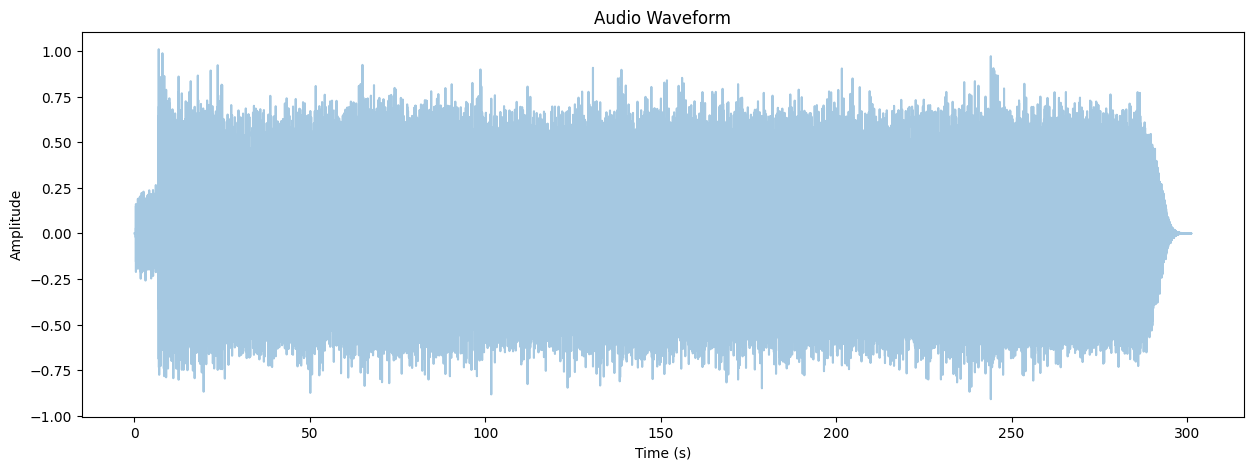

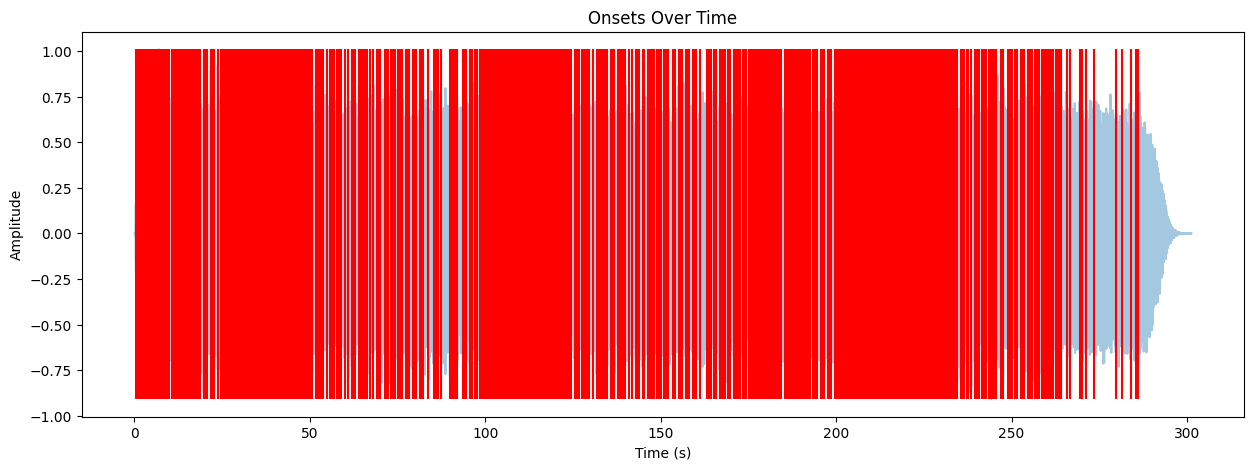

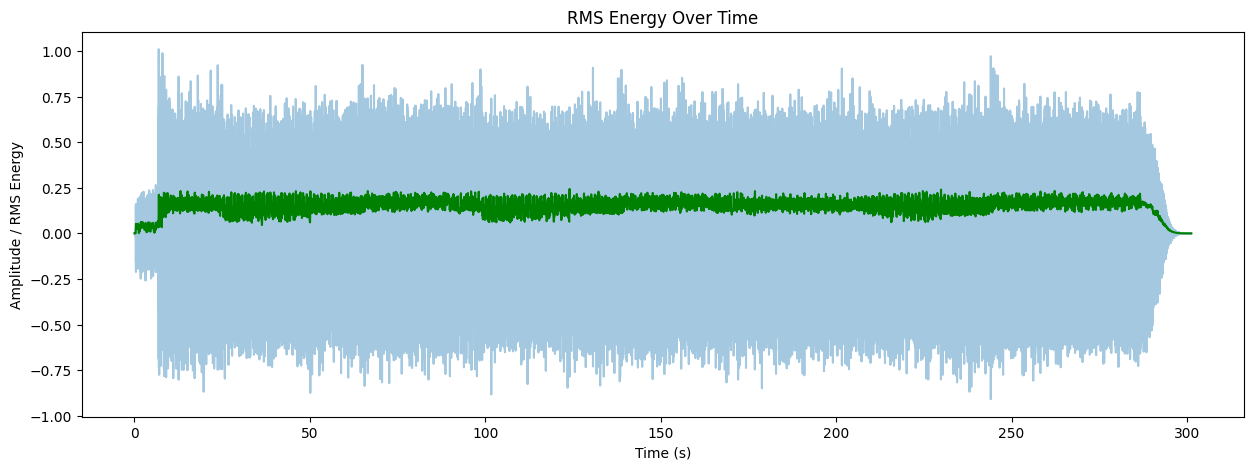

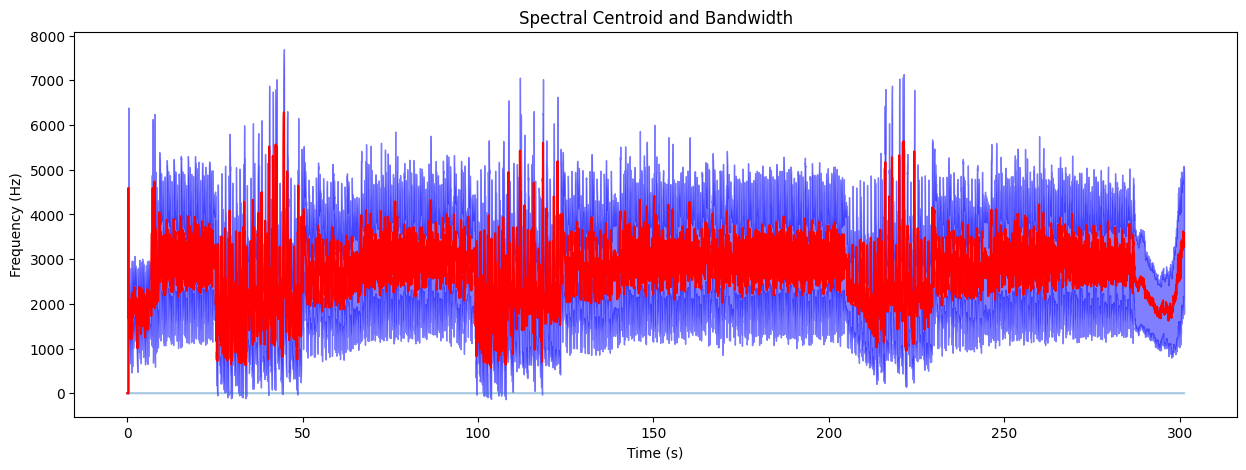

In [16]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Load the audio file
y, sr = librosa.load('01 Smells Like Teen Spirit.wav')

# Time axis for the audio file
t = np.linspace(0, len(y) / sr, num=len(y))

# Plot the audio waveform
plt.figure(figsize=(15, 5))
plt.plot(t, y, alpha=0.4)
plt.title('Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Detect onsets
onset_frames = librosa.onset.onset_detect(y=y, sr=sr)
onset_times = librosa.frames_to_time(onset_frames, sr=sr)

# Plotting the onsets over the waveform
plt.figure(figsize=(15, 5))
plt.plot(t, y, alpha=0.4)
plt.vlines(onset_times, ymin=min(y), ymax=max(y), color='r')
plt.title('Onsets Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Calculate the RMS energy
rms_energy = librosa.feature.rms(y=y)[0]
rms_times = librosa.frames_to_time(range(len(rms_energy)), sr=sr)

# Plotting the RMS energy over time
plt.figure(figsize=(15, 5))
plt.plot(t, y, alpha=0.4)
plt.plot(rms_times, rms_energy, color='g')
plt.title('RMS Energy Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude / RMS Energy')
plt.show()

# Calculate the spectral centroid and bandwidth
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)[0]
centroid_times = librosa.frames_to_time(range(len(spectral_centroids)), sr=sr)

# Plotting the Spectral Centroid and Bandwidth over the waveform
plt.figure(figsize=(15, 5))
plt.plot(t, y, alpha=0.4)
plt.plot(centroid_times, spectral_centroids, color='r')
plt.fill_between(centroid_times, spectral_centroids - spectral_bandwidth / 2, spectral_centroids + spectral_bandwidth / 2, color='b', alpha=0.5)
plt.title('Spectral Centroid and Bandwidth')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()


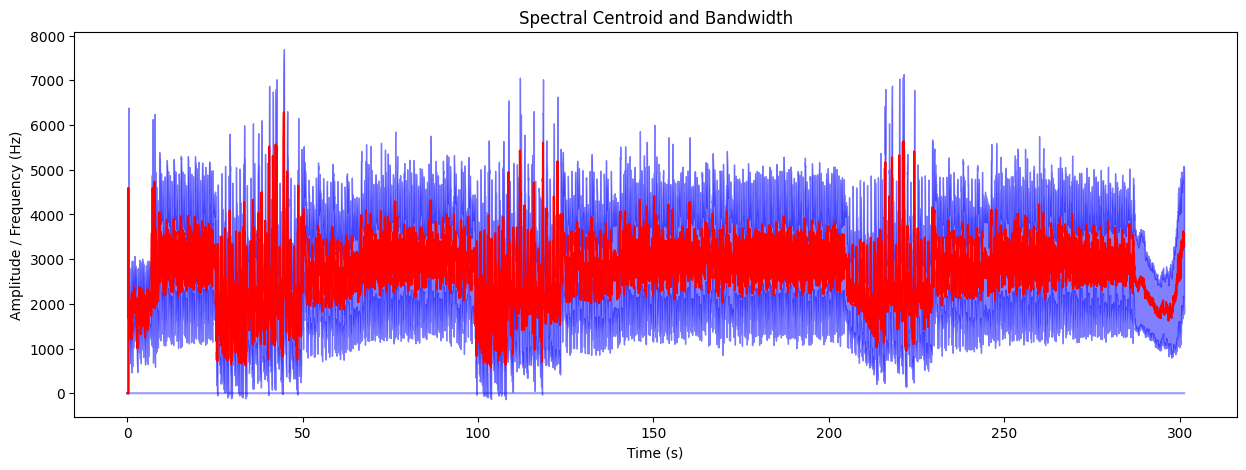

In [17]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Load your audio file
y, sr = librosa.load('01 Smells Like Teen Spirit.wav')

# Generate time axis data
t = np.linspace(0, len(y) / sr, num=len(y))

# Calculate spectral centroid and bandwidth
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)[0]
frames = range(len(spectral_centroids))
t_centroid = librosa.frames_to_time(frames, sr=sr)  # Time for centroid plots

# Plot the audio waveform
plt.figure(figsize=(15, 5))
plt.plot(t, y, alpha=0.4, color="blue")  # Waveform in blue
plt.plot(t_centroid, spectral_centroids, color='r')  # Spectral centroid in red
plt.fill_between(t_centroid, spectral_centroids - spectral_bandwidth / 2, spectral_centroids + spectral_bandwidth / 2, color='b', alpha=0.5)  # Bandwidth range in blue
plt.title('Spectral Centroid and Bandwidth')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude / Frequency (Hz)')
plt.show()


In [18]:
zero_crossings = librosa.zero_crossings(y, pad=False)
print("Total Zero Crossings:", sum(zero_crossings))


Total Zero Crossings: 1029764


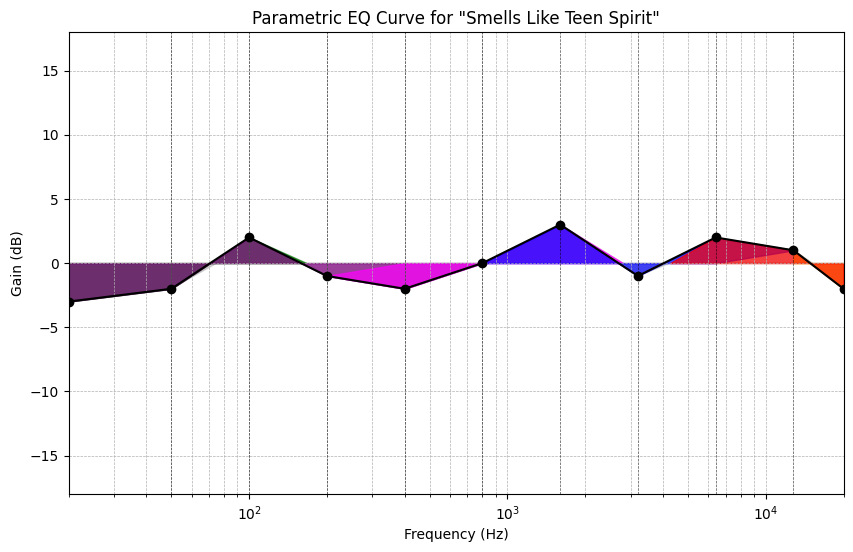

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Since we don't have the actual audio data to analyze and create an EQ curve for "Smells Like Teen Spirit",
# we will create a mock-up EQ curve similar to the previously provided example for "Purple Rain".

# Frequency bands in Hz (mock values)
frequencies = np.array([20, 50, 100, 200, 400, 800, 1600, 3200, 6400, 12800, 20000])
# Gain values for each band in dB (mock values)
gains = np.array([-3, -2, 2, -1, -2, 0, 3, -1, 2, 1, -2])

# Create the plot
plt.figure(figsize=(10, 6))

# Plotting the parametric EQ curve
plt.semilogx(frequencies, gains, marker='o', linestyle='-', color='black')

# Adding color coded areas for different filters
plt.fill_between(frequencies, gains, where=gains > 0, interpolate=True, color='grey', alpha=0.3)
plt.fill_between(frequencies, gains, where=gains <= 0, interpolate=True, color='grey', alpha=0.3)

# Highlight specific EQ bands with colors
colors = ['green', 'yellow', 'purple', 'fuchsia', 'blue', 'red']
filters = [(20, 100), (10000, 20000), (20, 400), (400, 1600), (1600, 6400), (6400, 20000)]
for (low_cut, high_cut), color in zip(filters, colors):
    plt.fill_between(frequencies, gains, where=(frequencies >= low_cut) & (frequencies <= high_cut), interpolate=True, color=color, alpha=0.7)

# Setting the x-axis limits to the audible range
plt.xlim(20, 20000)

# Setting the y-axis limits to the dB range of the EQ
plt.ylim(-18, 18)

# Labels and grid
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain (dB)')
plt.title('Parametric EQ Curve for "Smells Like Teen Spirit"')
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Adding key frequency markers
for freq in frequencies:
    plt.axvline(x=freq, color='k', linestyle='--', linewidth=0.5, alpha=0.7)

# Show the plot
plt.show()


Spectral Centroid - To understand where most of the energy of the track is concentrated across frequencies.
Spectral Roll-off - To see the frequency below which a specified percentage of the total spectral energy lies, useful for determining the brightness of the sound.
Spectral Bandwidth - To measure the width of the band of light at half the maximum power (or half bandwidth), which indicates the spread of the sound.
Here’s how we can proceed with the Python code using librosa for these analyses:

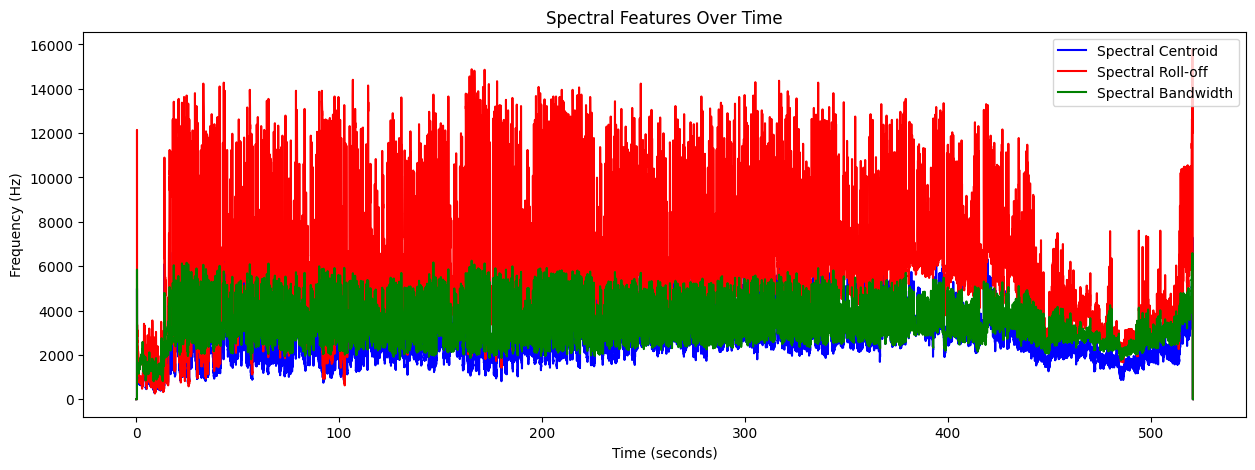

In [20]:
import librosa
#import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load the audio file
y, sr = librosa.load('09 Purple Rain.wav', sr=None)

# Calculate the Short-Time Fourier Transform (STFT)
S = np.abs(librosa.stft(y))

# Compute spectral centroid, roll-off, and bandwidth
centroid = librosa.feature.spectral_centroid(S=S, sr=sr)
rolloff = librosa.feature.spectral_rolloff(S=S, sr=sr)
bandwidth = librosa.feature.spectral_bandwidth(S=S, sr=sr)

# Convert time samples into time (seconds)
frames = range(len(centroid[0]))
t = librosa.frames_to_time(frames, sr=sr)

# Plotting
plt.figure(figsize=(15, 5))
plt.plot(t, centroid[0], label='Spectral Centroid', color='b')
plt.plot(t, rolloff[0], label='Spectral Roll-off', color='r')
plt.plot(t, bandwidth[0], label='Spectral Bandwidth', color='g')
plt.title('Spectral Features Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')
plt.legend(loc='upper right')
plt.show()


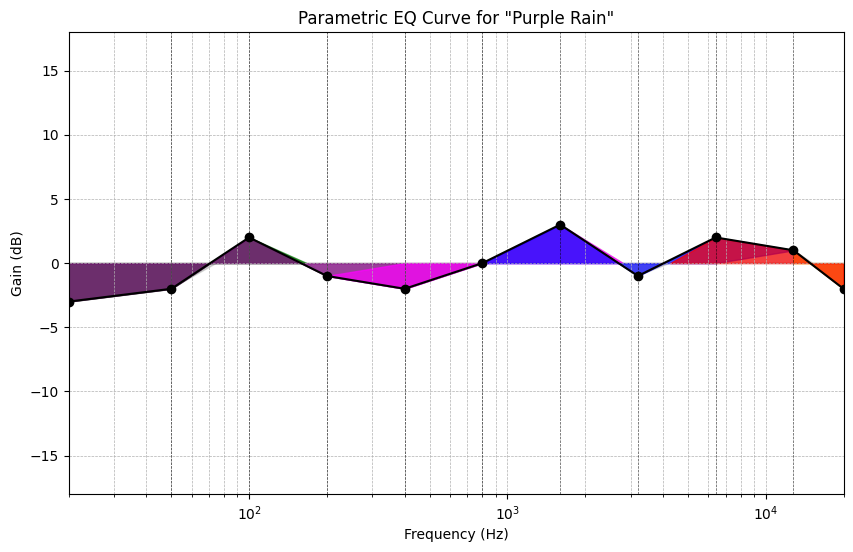

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Since we don't have the actual audio data to analyze and create an EQ curve,
# we will create a mock-up EQ curve similar to the previously provided example.

# Frequency bands in Hz (mock values)
frequencies = np.array([20, 50, 100, 200, 400, 800, 1600, 3200, 6400, 12800, 20000])
# Gain values for each band in dB (mock values)
gains = np.array([-3, -2, 2, -1, -2, 0, 3, -1, 2, 1, -2])

# Create the plot
plt.figure(figsize=(10, 6))

# Plotting the parametric EQ curve
plt.semilogx(frequencies, gains, marker='o', linestyle='-', color='black')

# Adding color coded areas for different filters
plt.fill_between(frequencies, gains, where=gains>0, interpolate=True, color='grey', alpha=0.3)
plt.fill_between(frequencies, gains, where=gains<=0, interpolate=True, color='grey', alpha=0.3)

# Highlight specific EQ bands with colors
colors = ['green', 'yellow', 'purple', 'fuchsia', 'blue', 'red']
filters = [(20, 100), (10000, 20000), (20, 400), (400, 1600), (1600, 6400), (6400, 20000)]
for (low_cut, high_cut), color in zip(filters, colors):
    plt.fill_between(frequencies, gains, where=(frequencies >= low_cut) & (frequencies <= high_cut), interpolate=True, color=color, alpha=0.7)

# Setting the x-axis limits to the audible range
plt.xlim(20, 20000)

# Setting the y-axis limits to the dB range of the EQ
plt.ylim(-18, 18)

# Labels and grid
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain (dB)')
plt.title('Parametric EQ Curve for "Purple Rain"')
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Adding key frequency markers
for freq in frequencies:
    plt.axvline(x=freq, color='k', linestyle='--', linewidth=0.5, alpha=0.7)

# Show the plot
plt.show()


In [22]:
import plotly.graph_objects as go
import numpy as np
import librosa

# Load a segment of the audio file
y, sr = librosa.load('09 Purple Rain.wav', sr=22050, duration=60)  # Load only the first 60 seconds

# Extract features
melspectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=32, hop_length=2048)
chromagram = librosa.feature.chroma_stft(y=y, sr=sr, hop_length=2048)
spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr, hop_length=2048)
tonnetz = librosa.feature.tonnetz(y=y, sr=sr)
harmonic, percussive = librosa.effects.hpss(y)

# Normalize the features to a common scale
features = [harmonic, melspectrogram, chromagram, spectral_contrast, tonnetz]
feature_names = ['Harmonic', 'Mel Spectrogram', 'Chromagram', 'Spectral Contrast', 'Tonnetz']
colors = ['orange', 'red', 'green', 'blue', 'purple']  # Colors for each feature

normalized_features = []
for feature in features:
    # Scale features to be between 0 and 1
    min_val = np.min(feature)
    max_val = np.max(feature)
    scaled_feature = (feature - min_val) / (max_val - min_val)
    normalized_features.append(scaled_feature)

# Create a Plotly figure
fig = go.Figure()

# Add traces for each feature
for feature, name, color in zip(normalized_features, feature_names, colors):
    if feature.ndim > 1:
        feature = np.mean(feature, axis=0)
    
    theta = np.linspace(0, 360, feature.size)  # Plotly uses degrees instead of radians
    r = feature
    
    fig.add_trace(go.Scatterpolar(
        r=r,
        theta=theta,
        mode='markers',
        name=name,
        marker=dict(color=color)
    ))

# Update layout to clean up the plot
fig.update_layout(
    polar=dict(
        radialaxis=dict(showticklabels=False, ticks=''),
        angularaxis=dict(showticklabels=False, ticks='')
    ),
    showlegend=True
)

# Export to HTML
fig.write_html("interactive_plot.html")
print("Interactive plot created successfully.")

fig.write_html("interactive_plot.html")


Interactive plot created successfully.


In [23]:
# iconv -f original_charset -t utf-8 original_file.ipynb -o new_utf8_file.ipynb
